In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier

In [8]:
X_train = pd.read_csv("/Users/shaun/Desktop/DSA4266/dsa4266-gnome/final_submission_data/stdtrainset.csv",index_col=0)
X_test = pd.read_csv("/Users/shaun/Desktop/DSA4266/dsa4266-gnome/final_submission_data/stdtestset.csv",index_col=0)
X_val = pd.read_csv("/Users/shaun/Desktop/DSA4266/dsa4266-gnome/final_submission_data/stdvalset.csv", index_col=0)

y_train = X_train.label
y_test = X_test.label
y_val = X_val.label

X_train = X_train.drop(columns=["label"])
X_test = X_test.drop(columns=["label"])
X_val = X_val.drop(columns=["label"])

Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 fe

/Users/shaun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


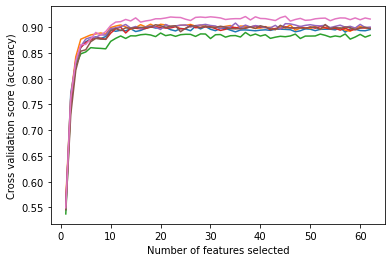

Num Features Before: 62
Num Features After: 29


In [9]:

min_features_to_select = 1

# To account for weight imbalances
scale_pos_weight = math.sqrt(y_train.value_counts().values[0]/y_train.value_counts().values[1])

# create a XGB model
clf_rf = RandomForestClassifier(random_state=4266)

# Recursively eliminate features with cross validation
rfecv = RFECV(estimator=clf_rf, cv=7, scoring='roc_auc', n_jobs=-1, verbose=10, step=1, min_features_to_select= min_features_to_select)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

X_train_new = rfecv.transform(X_train)
print("Num Features Before:", X_train.shape[1])
print("Num Features After:", X_train_new.shape[1])

In [10]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True])

In [11]:
X_train_new = X_train.iloc[:, rfecv.support_]

In [12]:
X_train_new.columns

Index(['dwelling_t-1', 'sd_-1', 'mean_-1', 'dwelling_t0', 'sd_0', 'mean_0',
       'dwelling_t1', 'sd_1', 'mean_1', 'nucleo_-3_T', 'nucleo_-2_G',
       'nucleo_2_T', 'nucleo_3_G', 'pwm_score', 'knf_AA', 'knf_AG', 'knf_GG',
       'knf_TG', 'knf_CT', 'cksnap_AA', 'cksnap_AG', 'cksnap_AT', 'cksnap_AC',
       'cksnap_GA', 'cksnap_GT', 'cksnap_GC', 'dacc_bet', 'js_all', 'eiip'],
      dtype='object')

In [13]:

rfecv_features = ['dwelling_t-1', 'sd_-1', 'mean_-1', 'dwelling_t0', 'sd_0', 'mean_0',
       'dwelling_t1', 'sd_1', 'mean_1', 'nucleo_-3_T', 'nucleo_-2_G',
       'nucleo_2_T', 'nucleo_3_G', 'pwm_score', 'knf_AA', 'knf_AG', 'knf_GG',
       'knf_TG', 'knf_CT', 'cksnap_AA', 'cksnap_AG', 'cksnap_AT', 'cksnap_AC',
       'cksnap_GA', 'cksnap_GT', 'cksnap_GC', 'dacc_bet', 'js_all', 'eiip']

In [14]:
len(rfecv_features)

29

In [15]:
X_train_new = X_train.loc[:,rfecv_features]

In [16]:
X_train_new

,dwelling_t-1,sd_-1,mean_-1,dwelling_t0,sd_0,mean_0,dwelling_t1,sd_1,mean_1,nucleo_-3_T,...,cksnap_AA,cksnap_AG,cksnap_AT,cksnap_AC,cksnap_GA,cksnap_GT,cksnap_GC,dacc_bet,js_all,eiip
0,0.086521,-0.061286,1.143673,0.740391,1.019254,1.205214,0.223718,1.582161,-1.141916,-0.556449,...,1.587098,-0.564808,-0.764888,0.396127,-0.770956,-0.436543,0.788257,-0.631135,-0.716670,0.237713
1,-0.839637,-0.581488,-0.097565,-0.775008,-0.883272,-0.242814,0.505861,0.049860,1.636934,-0.556449,...,-0.990416,1.770514,0.929317,0.396127,-0.770956,-0.436543,-0.855265,0.249209,-0.313473,0.403110
2,-0.302030,-0.723954,-0.469877,-0.418340,-0.692742,-0.961247,0.386090,-0.989407,0.639177,-0.556449,...,0.298341,1.770514,-0.764888,0.396127,0.952704,-0.436543,-0.855265,0.249209,-0.313473,-0.939914
3,1.404788,1.101941,1.644044,0.301845,-1.033132,-1.050465,-0.736462,-0.822385,0.596579,-0.556449,...,1.587098,-0.564808,0.929317,-0.980639,-0.770956,-0.436543,0.788257,-0.631135,-0.716670,0.226687
4,1.449696,1.070286,0.632134,1.986879,0.327096,0.887154,2.288659,1.440451,-0.208536,-0.556449,...,1.587098,-0.564808,-0.764888,-0.980639,0.952704,-0.436543,0.788257,-0.631135,-0.716670,-0.939914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109656,0.830441,-0.541343,0.659456,-0.486953,-0.103518,0.436286,-0.386635,1.155730,-0.851515,-0.556449,...,-0.990416,-0.564808,0.929317,-0.980639,2.676363,-0.436543,0.788257,0.249209,0.032125,-1.775721
109657,0.158355,0.087040,0.016470,1.292003,1.808367,0.322611,-1.148793,0.752101,-1.156735,-0.556449,...,-0.990416,-0.564808,-0.764888,0.396127,0.952704,-0.436543,-0.855265,0.249209,0.032125,0.579534
109658,0.028464,-0.218967,0.281974,-0.737239,-0.181365,0.212946,-0.498356,-0.883835,-0.408672,1.797111,...,-0.990416,-0.564808,-0.764888,0.396127,0.952704,-0.436543,0.788257,0.249209,0.032125,-0.598094
109659,-0.036874,-0.594499,-0.126514,-0.415996,0.639640,0.992287,-0.450277,-0.482068,-0.793719,-0.556449,...,0.298341,-0.564808,-0.764888,-0.980639,-0.770956,-0.436543,0.788257,-0.631135,-0.716670,0.579534


In [17]:
import pickle
model = pickle.load(open("/Users/shaun/Desktop/xgbmodel_new.pkl","rb"))

In [19]:
# To account for weight imbalances
scale_pos_weight = math.sqrt(y_train.value_counts().values[0]/y_train.value_counts().values[1])

# create a XGB model
clf_rf = RandomForestClassifier(random_state=4266)

In [20]:
clf_rf.fit(X_train_new,y_train)

RandomForestClassifier(random_state=4266)

In [21]:

X_test_new = X_test.loc[:, rfecv_features]
X_val_new = X_val.loc[:,rfecv_features]

In [22]:
y_pred = clf_rf.predict(X_val_new)
y_pred_proba = clf_rf.predict_proba(X_val_new)
auc_score = roc_auc_score(y_val, y_pred_proba[:,1])
ap = average_precision_score(y_val, y_pred_proba[:,1])

print("Accuracy:", accuracy_score(y_val, y_pred))
print("AUC-ROC:", auc_score)
print("PR-ROC:", ap)

Accuracy: 1.0
AUC-ROC: 1.0
PR-ROC: 1.0


In [23]:
y_pred = clf_rf.predict(X_test_new)
y_pred_proba = clf_rf.predict_proba(X_test_new)
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
ap = average_precision_score(y_test, y_pred_proba[:,1])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", auc_score)
print("PR-ROC:", ap)

Accuracy: 0.9522049765952205
AUC-ROC: 0.8460199664492315
PR-ROC: 0.3980857285741317
